In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
import os

warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns', None)
plt.rcParams['figure.figsize'] = (15, 12)

print("✓ All libraries imported successfully!")

✓ All libraries imported successfully!


In [3]:
current_dir = os.getcwd()
print(f"Current directory : {current_dir}")

Current directory : c:\Users\Dell\OneDrive\Desktop\clv_project\notebooks


In [4]:
try:
    csv_path = 'data/customers_data.csv'
    df = pd.read_csv(csv_path)
    print(f"✓ Successfully loaded from: {csv_path}")
except FileNotFoundError:
    # If not found, try parent directory
    csv_path = '../data/customers_data.csv'
    df = pd.read_csv(csv_path)
    print(f"✓ Successfully loaded from: {csv_path}")


✓ Successfully loaded from: ../data/customers_data.csv


In [5]:
print(f"Loaded {len(df)} records")
print(f" Shape: {df.shape}")

Loaded 5400 records
 Shape: (5400, 11)


In [6]:
print(df.dtypes)

customer_id                object
age                       float64
gender                     object
registration_date          object
purchase_frequency          int64
avg_order_value           float64
total_spending            float64
last_purchase_date         object
product_category           object
num_orders                float64
customer_lifetime_days      int64
dtype: object


In [7]:
print(df.isnull().sum())

customer_id                 0
age                       168
gender                    163
registration_date           0
purchase_frequency          0
avg_order_value             0
total_spending              0
last_purchase_date        161
product_category            0
num_orders                162
customer_lifetime_days      0
dtype: int64


In [8]:
df.duplicated().sum()

np.int64(337)

In [9]:
null_counts = df.isnull().sum()
print(null_counts[null_counts>0])

age                   168
gender                163
last_purchase_date    161
num_orders            162
dtype: int64


In [10]:
df.isnull().sum().sum()

np.int64(654)

In [11]:
df.duplicated().sum()

np.int64(337)

In [12]:
#duplicate by customer id
df.duplicated(subset=['customer_id']).sum()

np.int64(400)

In [13]:
df.head(5)

,customer_id,age,gender,registration_date,purchase_frequency,avg_order_value,total_spending,last_purchase_date,product_category,num_orders,customer_lifetime_days
0,CUST_00001,56.0,Male,2020-04-09,20,531.930524,10481.945804,2020-10-26,Home,18.0,749
1,CUST_00002,69.0,Male,2022-09-16,45,883.201356,6262.961622,2020-06-22,Clothing,63.0,412
2,CUST_00003,46.0,Female,2021-08-21,32,944.715773,10751.069590,2021-10-07,Electronics,93.0,384
3,CUST_00004,32.0,Male,2021-02-06,2,105.054170,13513.904610,2023-10-28,Electronics,26.0,875
4,CUST_00005,60.0,Female,2021-01-30,32,275.486704,1948.847924,2020-01-24,Sports,84.0,897


In [14]:
df_clean=df.copy()

In [15]:
#remove duplicates
initial_rows = len(df_clean)
df_clean = df_clean.drop_duplicates(subset=['customer_id'],keep='first')
removed_dups = initial_rows-len(df_clean)
print({removed_dups})

{400}


In [16]:
#remove rows with NULL values
initial_rows=len(df_clean)
df_clean = df_clean.dropna()
removed_nulls = initial_rows-len(df_clean)
print({removed_nulls})

{572}


In [17]:
#remove rows with negative values
df_clean = df_clean[(df_clean['purchase_frequency']>0) & 
                    (df_clean['avg_order_value'] > 0) & 
                     (df_clean['total_spending'] > 0) &
                     (df_clean['num_orders'] > 0) &
                     (df_clean['customer_lifetime_days'] > 0)]
removed_negatives = initial_rows-len(df_clean)
print({removed_negatives})


{615}


In [18]:
#remove outliers
for col in ['avg_order_value','total_spending','num_orders']:
    q1 = df_clean[col].quantile(0.25)
    q3 = df_clean[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 3*iqr
    upper_bound = q3 + 3*iqr
    df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]

removed_outliers = initial_rows-len(df_clean)
print({removed_outliers})

{706}


In [19]:
initial_rows = len(df_clean)
df_clean['registration_date'] = pd.to_datetime(df_clean['registration_date'])
df_clean['last_purchase_date'] = pd.to_datetime(df_clean['last_purchase_date'])
df_clean = df_clean[df_clean['last_purchase_date'] >= df_clean['registration_date']]
removed_dates = initial_rows-len(df_clean)
print({removed_dates})


{2163}


In [20]:
#reset index
df_clean = df_clean.reset_index(drop=True)


In [21]:
print(len(df_clean))

2131


In [22]:
print(df_clean.shape)
print(len(df_clean))
print(df_clean.isnull().sum().sum())
print(df_clean.duplicated().sum())

(2131, 11)
2131
0
0


In [23]:
print(df_clean.describe())

               age           registration_date  purchase_frequency  \
count  2131.000000                        2131         2131.000000   
mean     45.811356  2021-05-15 00:58:47.358048           24.797278   
min      18.000000         2020-01-01 00:00:00            1.000000   
25%      32.000000         2020-08-04 12:00:00           13.000000   
50%      46.000000         2021-03-20 00:00:00           24.000000   
75%      60.000000         2022-01-15 00:00:00           37.000000   
max      74.000000         2023-10-22 00:00:00           49.000000   
std      16.197058                         NaN           14.202136   

       avg_order_value  total_spending             last_purchase_date  \
count      2131.000000     2131.000000                           2131   
mean        504.732848     7635.937211  2022-09-02 07:12:28.381041664   
min           5.174638       24.987859            2020-01-27 00:00:00   
25%         257.019844     3831.717619            2022-01-06 12:00:00   
50% 

In [24]:
df_clean.head(5)

,customer_id,age,gender,registration_date,purchase_frequency,avg_order_value,total_spending,last_purchase_date,product_category,num_orders,customer_lifetime_days
0,CUST_00001,56.0,Male,2020-04-09,20,531.930524,10481.945804,2020-10-26,Home,18.0,749
1,CUST_00003,46.0,Female,2021-08-21,32,944.715773,10751.069590,2021-10-07,Electronics,93.0,384
2,CUST_00004,32.0,Male,2021-02-06,2,105.054170,13513.904610,2023-10-28,Electronics,26.0,875
3,CUST_00006,25.0,Other,2021-02-18,45,979.238248,3994.114240,2023-05-09,Sports,13.0,708
4,CUST_00012,28.0,Other,2023-02-27,5,857.018693,7491.298086,2023-06-25,Electronics,81.0,219


In [25]:
print(f"   Total customers: {len(df_clean)}")
print(f"   Average age: {df_clean['age'].mean():.2f} years")
print(f"   Age range: {df_clean['age'].min()} - {df_clean['age'].max()} years")
print(f"\n   Gender distribution:")
print(df_clean['gender'].value_counts())

   Total customers: 2131
   Average age: 45.81 years
   Age range: 18.0 - 74.0 years

   Gender distribution:
gender
Female    721
Male      705
Other     705
Name: count, dtype: int64


In [26]:
print(f"   Average total spending: ${df_clean['total_spending'].mean():.2f}")
print(f"   Median total spending: ${df_clean['total_spending'].median():.2f}")
print(f"   Min-Max: ${df_clean['total_spending'].min():.2f} - ${df_clean['total_spending'].max():.2f}")
print(f"   Average order value: ${df_clean['avg_order_value'].mean():.2f}")

   Average total spending: $7635.94
   Median total spending: $7701.52
   Min-Max: $24.99 - $14992.25
   Average order value: $504.73


In [27]:
print(f"   Average purchase frequency: {df_clean['purchase_frequency'].mean():.2f}")
print(f"   Average number of orders: {df_clean['num_orders'].mean():.2f}")
print(f"   Average customer lifetime: {df_clean['customer_lifetime_days'].mean():.2f} days")


   Average purchase frequency: 24.80
   Average number of orders: 73.66
   Average customer lifetime: 693.54 days


In [28]:
print(df_clean['product_category'].value_counts())

product_category
Beauty         445
Home           432
Clothing       430
Sports         418
Electronics    406
Name: count, dtype: int64


In [29]:
sns.set_style("whitegrid")
plt.rcParams['figure.dpi'] = 100

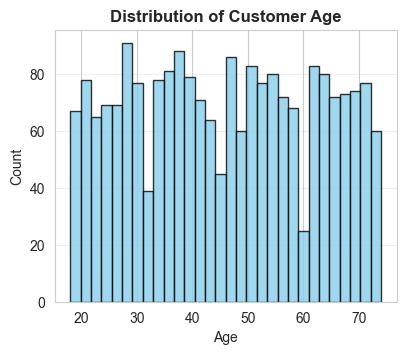

In [30]:
# 1. Age distribution
ax1 = plt.subplot(3, 3, 1)
plt.hist(df_clean['age'], bins=30, color='skyblue', edgecolor='black', alpha=0.8)
plt.xlabel('Age', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.title('Distribution of Customer Age', fontsize=12, fontweight='bold')
plt.grid(axis='y', alpha=0.3)

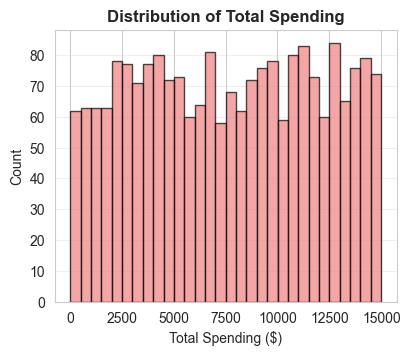

In [31]:

# 2. Total spending distribution
ax2 = plt.subplot(3, 3, 2)
plt.hist(df_clean['total_spending'], bins=30, color='lightcoral', edgecolor='black', alpha=0.7)
plt.xlabel('Total Spending ($)', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.title('Distribution of Total Spending', fontsize=12, fontweight='bold')
plt.grid(axis='y', alpha=0.3)

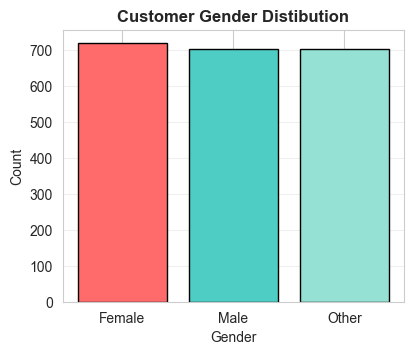

In [32]:
ax3 = plt.subplot(3,3,3)
gender_counts = df_clean['gender'].value_counts()
plt.bar(gender_counts.index,gender_counts.values, color=['#FF6B6B', '#4ECDC4', '#95E1D3'], edgecolor='black')
plt.xlabel('Gender',fontsize=10)
plt.ylabel('Count',fontsize=10)
plt.title('Customer Gender Distibution',fontsize=12,fontweight='bold')
plt.grid(axis='y',alpha=0.3)

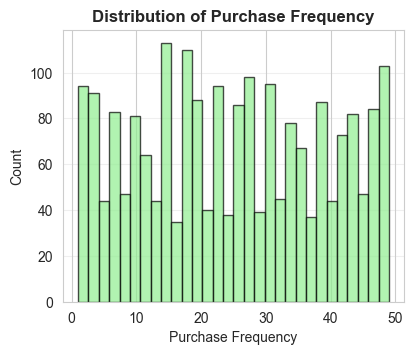

In [33]:
# 4. Purchase frequency distribution
ax4 = plt.subplot(3, 3, 4)
plt.hist(df_clean['purchase_frequency'], bins=30, color='lightgreen', edgecolor='black', alpha=0.7)
plt.xlabel('Purchase Frequency', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.title('Distribution of Purchase Frequency', fontsize=12, fontweight='bold')
plt.grid(axis='y', alpha=0.3)

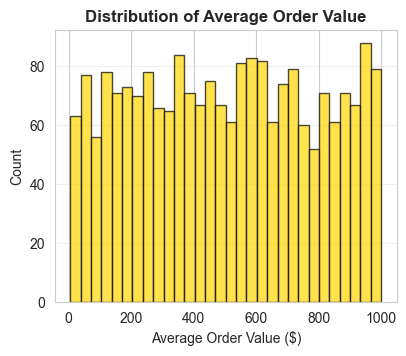

In [34]:
# 5. Average order value distribution
ax5 = plt.subplot(3, 3, 5)
plt.hist(df_clean['avg_order_value'], bins=30, color='gold', edgecolor='black', alpha=0.7)
plt.xlabel('Average Order Value ($)', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.title('Distribution of Average Order Value', fontsize=12, fontweight='bold')
plt.grid(axis='y', alpha=0.3)

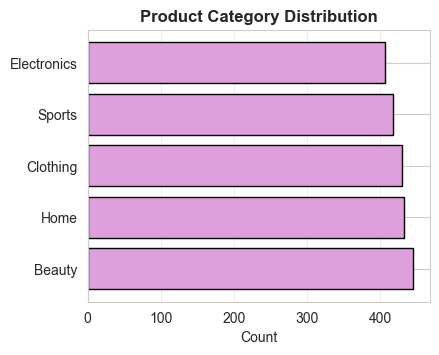

In [35]:
# 6. Product category distribution
ax6 = plt.subplot(3, 3, 6)
category_counts = df_clean['product_category'].value_counts()
plt.barh(category_counts.index, category_counts.values, color='plum', edgecolor='black')
plt.xlabel('Count', fontsize=10)
plt.title('Product Category Distribution', fontsize=12, fontweight='bold')
plt.grid(axis='x', alpha=0.3)

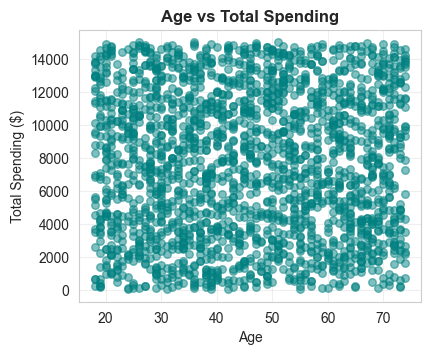

In [36]:

# 7. Age vs Total Spending
ax7 = plt.subplot(3, 3, 7)
plt.scatter(df_clean['age'], df_clean['total_spending'], alpha=0.5, s=30, color='teal')
plt.xlabel('Age', fontsize=10)
plt.ylabel('Total Spending ($)', fontsize=10)
plt.title('Age vs Total Spending', fontsize=12, fontweight='bold')
plt.grid(alpha=0.3)

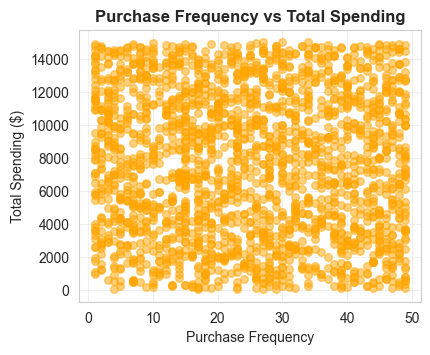

In [37]:
# 8. Purchase Frequency vs Total Spending
ax8 = plt.subplot(3, 3, 8)
plt.scatter(df_clean['purchase_frequency'], df_clean['total_spending'], alpha=0.5, s=30, color='orange')
plt.xlabel('Purchase Frequency', fontsize=10)
plt.ylabel('Total Spending ($)', fontsize=10)
plt.title('Purchase Frequency vs Total Spending', fontsize=12, fontweight='bold')
plt.grid(alpha=0.3)

Text(0.5, 0.98, '')

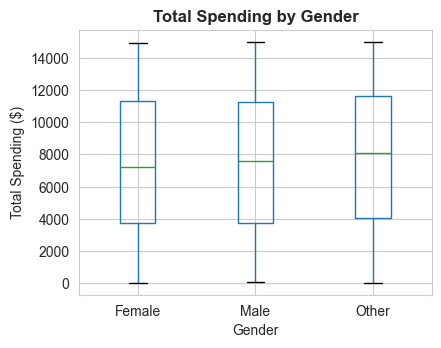

In [38]:
# 9. Box plot: Spending by Gender
ax9 = plt.subplot(3, 3, 9)
df_clean.boxplot(column='total_spending', by='gender', ax=ax9)
plt.xlabel('Gender', fontsize=10)
plt.ylabel('Total Spending ($)', fontsize=10)
plt.title('Total Spending by Gender', fontsize=12, fontweight='bold')
plt.suptitle('')

✓ Saved to: ../output/eda_visualizations.png


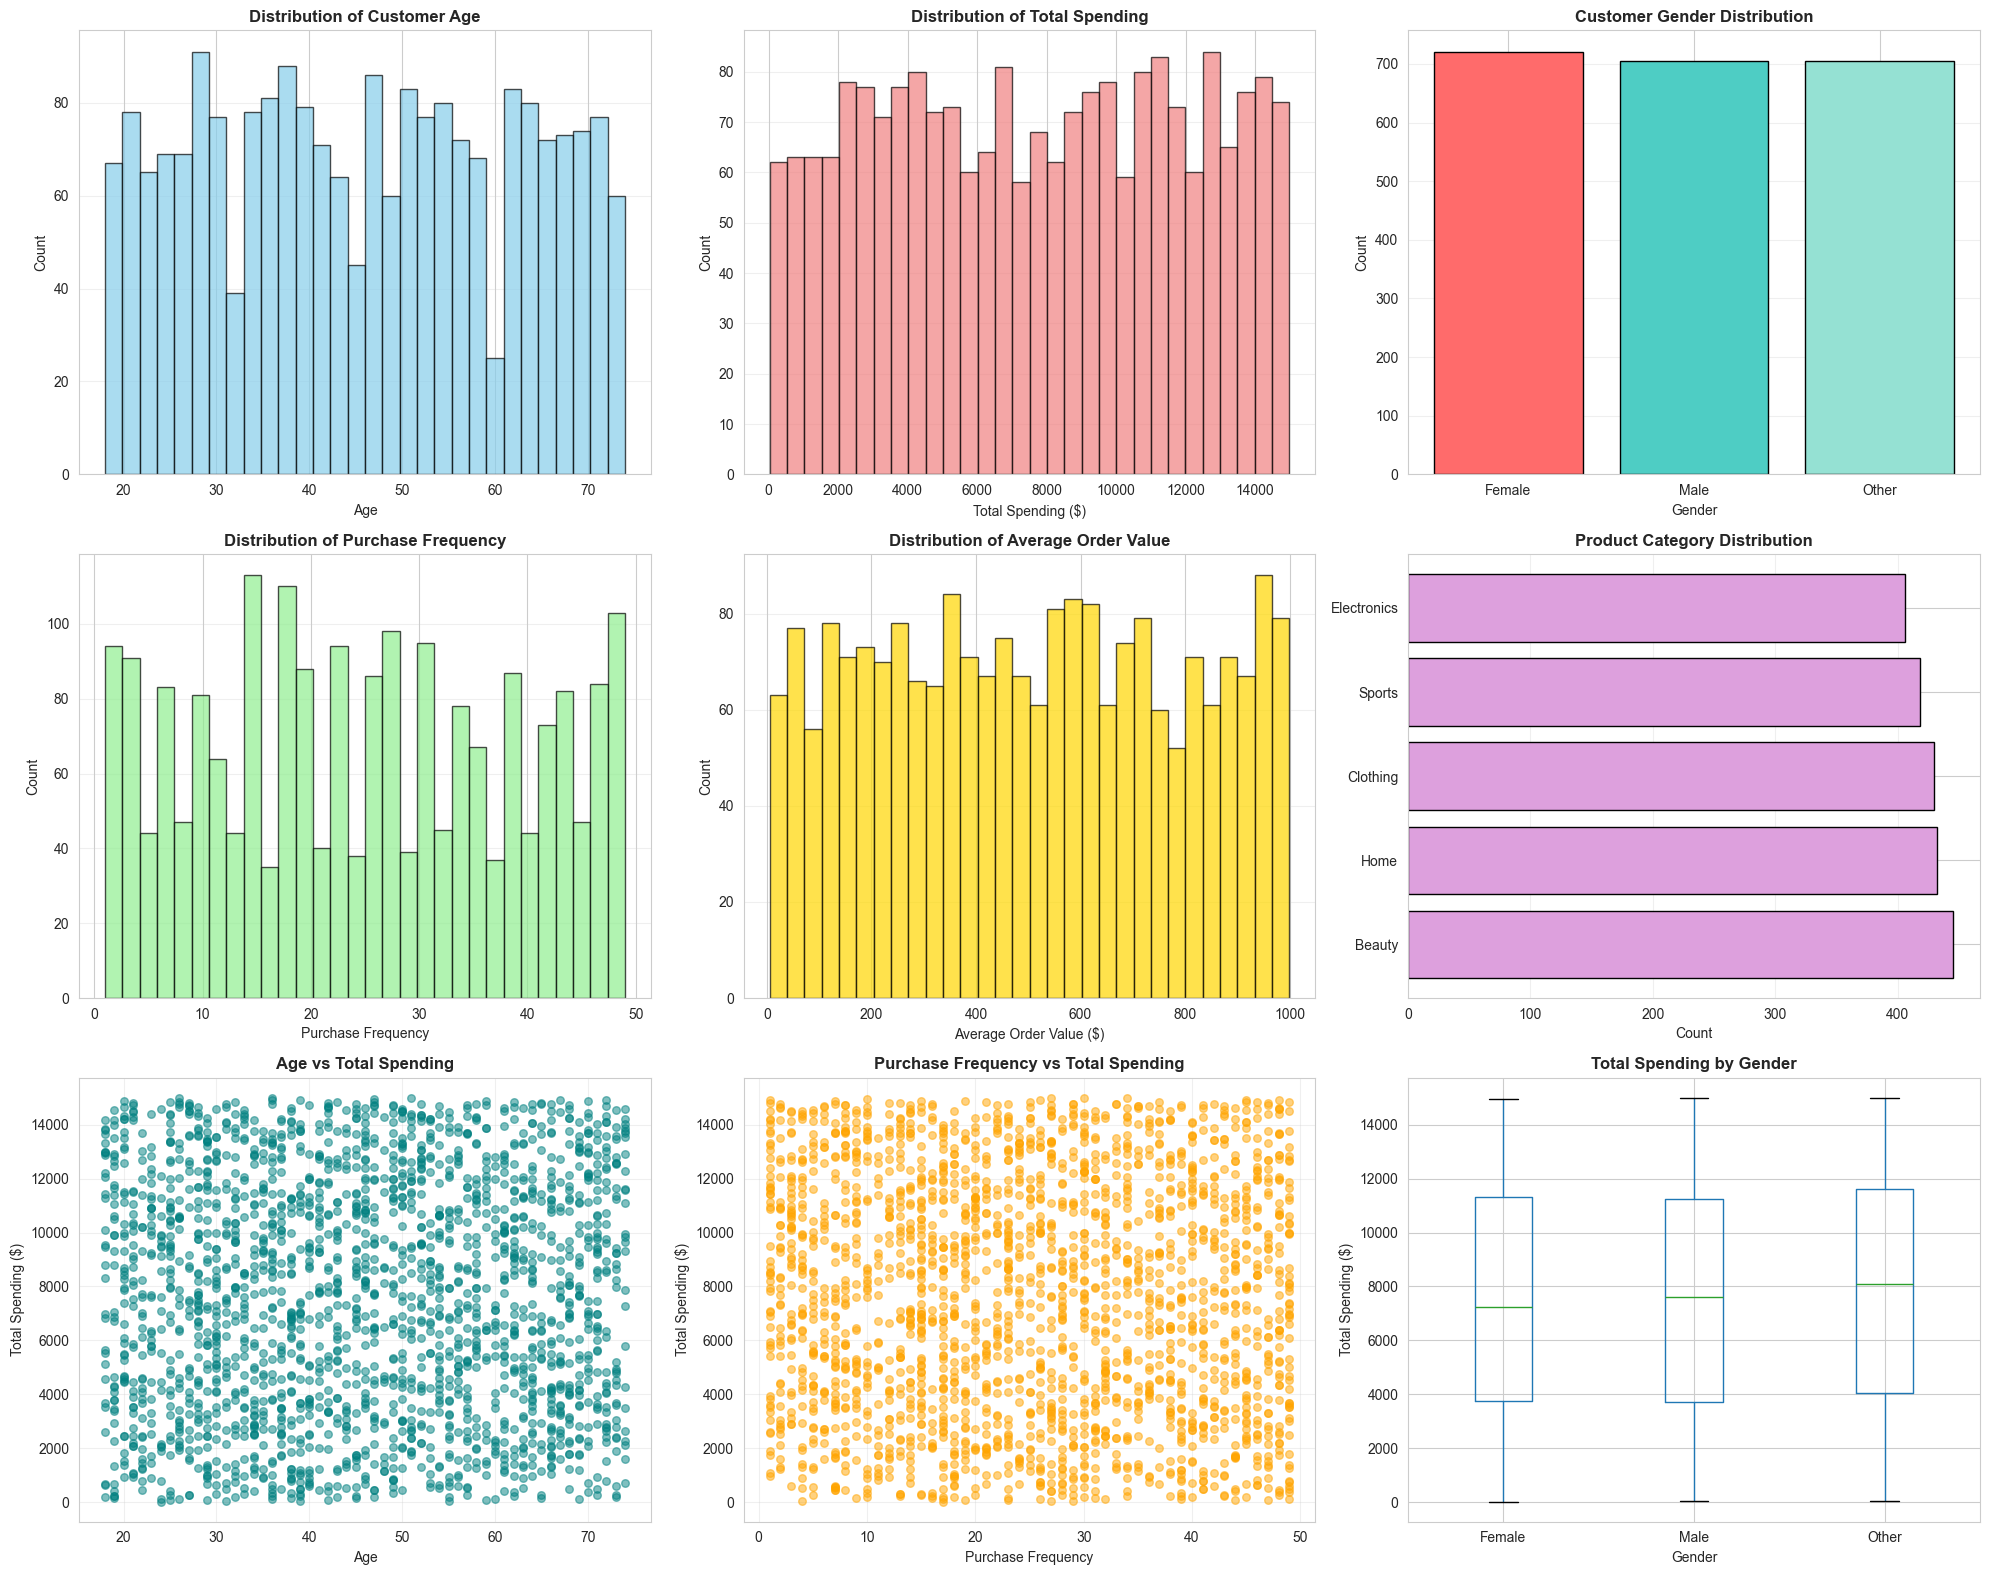

In [39]:
sns.set_style("whitegrid")
plt.rcParams['figure.dpi'] = 100

# Create figure with multiple subplots
fig, axes = plt.subplots(3, 3, figsize=(20, 16))
fig.patch.set_facecolor('white')

# Flatten axes for easier iteration
axes = axes.flatten()

# 1. Age distribution
axes[0].hist(df_clean['age'], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Age', fontsize=10)
axes[0].set_ylabel('Count', fontsize=10)
axes[0].set_title('Distribution of Customer Age', fontsize=12, fontweight='bold')
axes[0].grid(axis='y', alpha=0.3)

# 2. Total spending distribution
axes[1].hist(df_clean['total_spending'], bins=30, color='lightcoral', edgecolor='black', alpha=0.7)
axes[1].set_xlabel('Total Spending ($)', fontsize=10)
axes[1].set_ylabel('Count', fontsize=10)
axes[1].set_title('Distribution of Total Spending', fontsize=12, fontweight='bold')
axes[1].grid(axis='y', alpha=0.3)

# 3. Gender distribution
gender_counts = df_clean['gender'].value_counts()
axes[2].bar(gender_counts.index, gender_counts.values, color=['#FF6B6B', '#4ECDC4', '#95E1D3'], edgecolor='black')
axes[2].set_xlabel('Gender', fontsize=10)
axes[2].set_ylabel('Count', fontsize=10)
axes[2].set_title('Customer Gender Distribution', fontsize=12, fontweight='bold')
axes[2].grid(axis='y', alpha=0.3)

# 4. Purchase frequency distribution
axes[3].hist(df_clean['purchase_frequency'], bins=30, color='lightgreen', edgecolor='black', alpha=0.7)
axes[3].set_xlabel('Purchase Frequency', fontsize=10)
axes[3].set_ylabel('Count', fontsize=10)
axes[3].set_title('Distribution of Purchase Frequency', fontsize=12, fontweight='bold')
axes[3].grid(axis='y', alpha=0.3)

# 5. Average order value distribution
axes[4].hist(df_clean['avg_order_value'], bins=30, color='gold', edgecolor='black', alpha=0.7)
axes[4].set_xlabel('Average Order Value ($)', fontsize=10)
axes[4].set_ylabel('Count', fontsize=10)
axes[4].set_title('Distribution of Average Order Value', fontsize=12, fontweight='bold')
axes[4].grid(axis='y', alpha=0.3)

# 6. Product category distribution
category_counts = df_clean['product_category'].value_counts()
axes[5].barh(category_counts.index, category_counts.values, color='plum', edgecolor='black')
axes[5].set_xlabel('Count', fontsize=10)
axes[5].set_title('Product Category Distribution', fontsize=12, fontweight='bold')
axes[5].grid(axis='x', alpha=0.3)

# 7. Age vs Total Spending
axes[6].scatter(df_clean['age'], df_clean['total_spending'], alpha=0.5, s=30, color='teal')
axes[6].set_xlabel('Age', fontsize=10)
axes[6].set_ylabel('Total Spending ($)', fontsize=10)
axes[6].set_title('Age vs Total Spending', fontsize=12, fontweight='bold')
axes[6].grid(alpha=0.3)

# 8. Purchase Frequency vs Total Spending
axes[7].scatter(df_clean['purchase_frequency'], df_clean['total_spending'], alpha=0.5, s=30, color='orange')
axes[7].set_xlabel('Purchase Frequency', fontsize=10)
axes[7].set_ylabel('Total Spending ($)', fontsize=10)
axes[7].set_title('Purchase Frequency vs Total Spending', fontsize=12, fontweight='bold')
axes[7].grid(alpha=0.3)

# 9. Box plot: Spending by Gender
df_clean.boxplot(column='total_spending', by='gender', ax=axes[8])
axes[8].set_xlabel('Gender', fontsize=10)
axes[8].set_ylabel('Total Spending ($)', fontsize=10)
axes[8].set_title('Total Spending by Gender', fontsize=12, fontweight='bold')
plt.suptitle('')

plt.tight_layout()

# Create output folder if not exists
output_dir = '../output' 

if not os.path.exists(output_dir):
    os.makedirs(output_dir)
    print("✓ Created output folder")

# Phir save karo
plt.savefig(f'{output_dir}/eda_visualizations.png', dpi=300, bbox_inches='tight', facecolor='white')
print(f"✓ Saved to: {output_dir}/eda_visualizations.png")

In [40]:
#correaltion analysis
numeric_cols = df_clean.select_dtypes(include=[np.number]).columns
coorelation_matrix = df_clean[numeric_cols].corr()
print("coorelation matrix")
print(coorelation_matrix)

coorelation matrix
                             age  purchase_frequency  avg_order_value  \
age                     1.000000            0.004165        -0.001598   
purchase_frequency      0.004165            1.000000        -0.040906   
avg_order_value        -0.001598           -0.040906         1.000000   
total_spending          0.004917           -0.038704         0.009800   
num_orders              0.018544            0.033943         0.023625   
customer_lifetime_days  0.023070            0.006102         0.021327   

                        total_spending  num_orders  customer_lifetime_days  
age                           0.004917    0.018544                0.023070  
purchase_frequency           -0.038704    0.033943                0.006102  
avg_order_value               0.009800    0.023625                0.021327  
total_spending                1.000000   -0.010292                0.052308  
num_orders                   -0.010292    1.000000                0.003032  
custome

✓ Saved to: ../output/correlation_heatmap.png


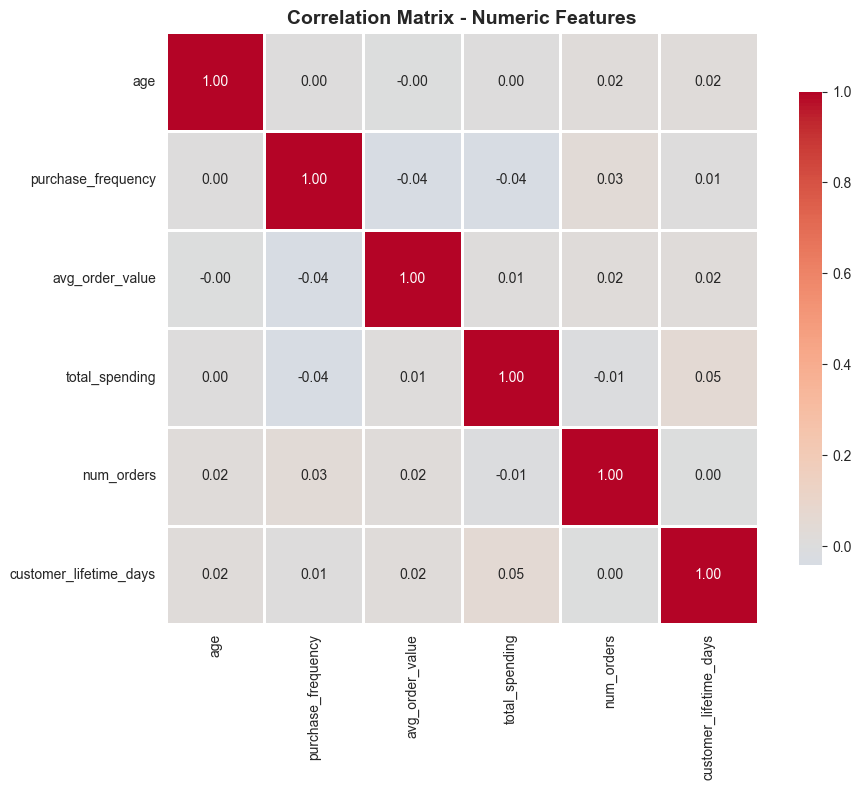

In [41]:

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(coorelation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix - Numeric Features', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig(f'{output_dir}/correlation_heatmap.png', dpi=300, bbox_inches='tight')
print(f"✓ Saved to: {output_dir}/correlation_heatmap.png")

In [42]:
# Create cleaned_data folder
cleaned_dir = '../cleaned_data'

if not os.path.exists(cleaned_dir):
    os.makedirs(cleaned_dir)
    print("✓ Created cleaned_data folder")

# Save cleaned data
try:
    cleaned_csv_path = f'{cleaned_dir}/customers_data_cleaned.csv'
    df_clean.to_csv(cleaned_csv_path, index=False)
    print(f"✓ Cleaned dataset saved: {cleaned_csv_path}")
except Exception as e:
    print(f"Error saving file: {e}")

✓ Cleaned dataset saved: ../cleaned_data/customers_data_cleaned.csv
